In [1]:
""" Functions for generating 2D grid maps, for AI Lab 2 - path planning.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):

    '''Generates a random 2d map with obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    '''
    
    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.random_integers(0, size_x-1,2), np.random.random_integers(0, size_y-1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3
    
    print('start',map2d[xloc[0]][yloc[0]], 'Goal', map2d[xloc[1]][yloc[1]]  )
    print('start',xloc[0], yloc[0], 'Goal', xloc[1], yloc[1])
    

    return map2d

In [2]:
# Generate 2d grid map with rotated-H-shape object
def generateMap2d_obstacle(size_):
    '''Generates a random 2d map with a rotated-H-shape object in the middle and obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;
                                            
       [ytop, ybot, minx] : list
           information of the rotated-H-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall 
    '''
    
    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d==-2] = 0
    map2d[map2d==-3] = 0

    # add special obstacle
    xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
    ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
    xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3, size_x-5)
    ybot = np.random.random_integers(5, size_y//5 - 3)


    map2d[ybot, xbot[0]:xbot[1]+1] = -1
    map2d[ytop, xtop[0]:xtop[1]+1] = -1
    minx = (xbot[0]+xbot[1])//2
    maxx = (xtop[0]+xtop[1])//2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx+1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]

    map2d[goalp[1],goalp[0]] = -3
    #return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx]

In [3]:
# helper function for plotting the result
def plotMap(map2d_, path_=None, title_ =''):
    
    '''Plots a map (image) of a 2d matrix with a path from start point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''
    
    import matplotlib.cm as cm
    plt.interactive(False)
    
    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)
    
    
    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [0.8, 0.4, 0.1, 0.5]  # white

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_>0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]]-1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]
                
    if  path_ is not None: path = path_.T.tolist()
    
    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    if  path_ is not None:plt.plot(path[:][0],path[:][1], color='magenta',linewidth=2.5)
    plt.show()



In [4]:
def get_neighbors(current,map1):
    x,y =current
    adjacent_cells=[]
    
    shift = [[-1, 0 ], # go up
            [ 0, -1], # go left
            [ 1, 0 ], # go down
            [ 0, 1 ]] # go right
    
    
    for i in range(len(shift)):
        x1 = x + shift[i][0]
        y1 = y + shift[i][1]
        
        #check if outside the boundary
        if x1 >= 0 and x1 < len(map1) and y1 >=0 and y1 <len(map1[0]):
            #move to adjacent cell if only its value is zero
            if map1[x1][y1] == 0 and map1[x1][y1] != -1   or map1[x1][y1]==-3 :
                adjacent_cells.append([x1, y1])
    return adjacent_cells


In [5]:
from collections import deque
# An example of search algorithm, feel free to modify and implement the missing part
#def bfs_search(map1, start, goal):
def dfs_search(map1):

    exp_map = np.copy(map1)

    for row in range(len(map1)):
        print("")
        for column in range(len(map1)):
            if map1[row][column]==-2:
                xs, ys= row,column
                
            if map1[row][column]==-3:
                xg, yg= row,column
                
    
    start_position=[xs, ys]
    goal_position=[xg, yg]    

    # cost moving to another cell
    moving_cost = 1
    
    cost1=0
    # set to store visited cells
    visited=[]
    # Boolean found if goal is reached
    found=False

    # stack FIFO
    #frontier = dueue()
    frontier = deque()
    # path taken

    came_from=dict()
    
    #node distance
    g=0

    #frontier.add(cost1, start_position)
    frontier.append(start_position)

    while (frontier and found==False):
        
        current = frontier.pop()
        #add the visited cell to the set() visited
        visited.append(start_position)
        came_from[(xs,ys)]=tuple(current)
        # check if the goal is reached
        g+=1
        if current == goal_position:
            found=True
            break
            
        # for each neighbour of the current cell
        # Implement get_neighbors function (return nodes to expand next)
        # (make sure you avoid repetitions!)
        cells=get_neighbors(current, map1)
        for next1 in cells:
            if next1 not in visited:
                visited.append(next1)
                # compute cost to reach next cell
                # Implement cost function
                (x,y)=next1
                
                #cost is number of nodes/cells expanded
                cost1+=1
                if exp_map[x][y]!=-3:exp_map[x][y]=cost1

                # add next cell to open list
                frontier.append(next1) ###Counter check which is the priority and item.
            
                # add to path
                came_from[(x,y)]=tuple(current)
                #if next1 not in came_from:came_from.append(next1)

    if found==False: 
        print("No path to goal")
        return -1
    else:
        
        a,b=goal_position
        goal_position2=b,a
        reverse_path = [goal_position2]
        while tuple(goal_position) != tuple(start_position):
            goal_position = came_from[tuple(goal_position)]
            [x2,y2]=goal_position
            reverse_path.append((y2,x2))
            path2=list(reversed(reverse_path))
            
        path1=np.array(path2)
        plotMap(exp_map,path1,'path' )
        return cost1, len(path1)

C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 32 16 Goal 12 26






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


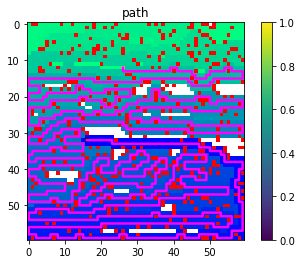

(3008, 1103)

In [6]:
map1 = generateMap2d([60, 60])
dfs_search(map1)

C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.random_integers(7*size_y//10 + 3, s

start -2.0 Goal -3.0
start 43 42 Goal 42 9






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


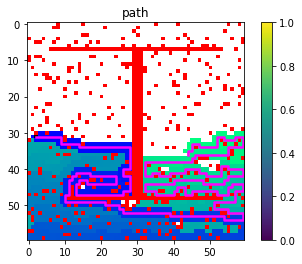

(1356, 354)

In [7]:
map2, info=generateMap2d_obstacle([60, 60])
dfs_search(map2)

C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 17 8 Goal 22 6






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


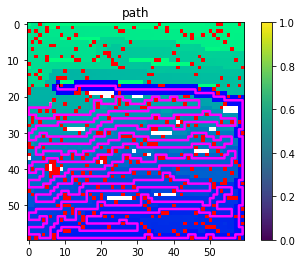

start -2.0 Goal -3.0
start 39 51 Goal 55 39






























































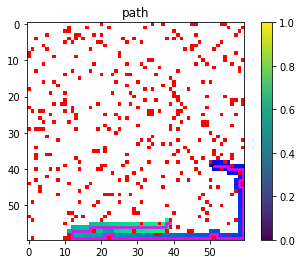

start -2.0 Goal -3.0
start 59 9 Goal 56 30






























































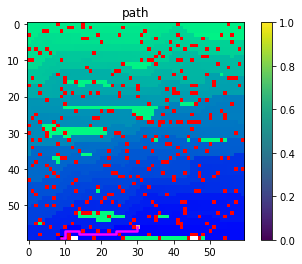

start -2.0 Goal -3.0
start 45 30 Goal 26 31






























































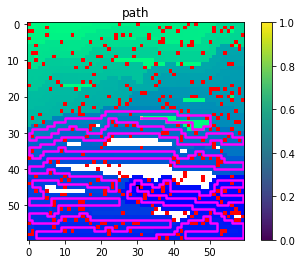

start -2.0 Goal -3.0
start 41 34 Goal 27 19






























































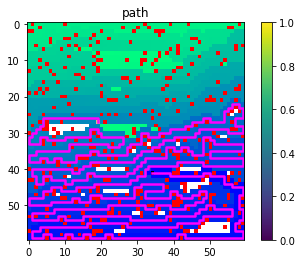

start -2.0 Goal -3.0
start 4 1 Goal 36 4






























































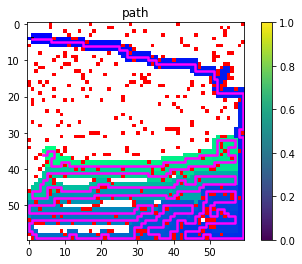

start -2.0 Goal -3.0
start 54 10 Goal 40 51






























































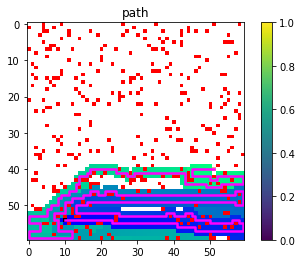

start -2.0 Goal -3.0
start 16 11 Goal 8 26






























































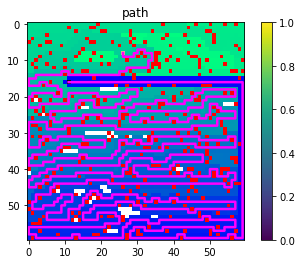

start -2.0 Goal -3.0
start 12 54 Goal 18 13






























































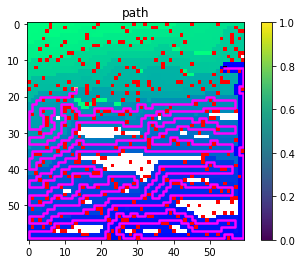

start -2.0 Goal -3.0
start 17 23 Goal 24 39






























































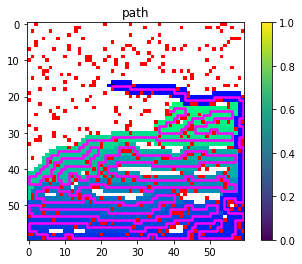

start -2.0 Goal -3.0
start 38 48 Goal 5 2






























































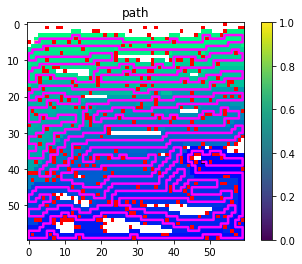

start -2.0 Goal -3.0
start 41 59 Goal 6 54






























































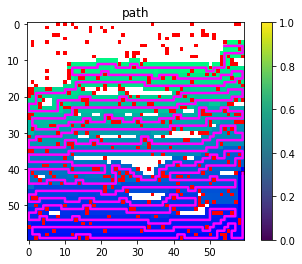

start -2.0 Goal -3.0
start 0 33 Goal 7 37






























































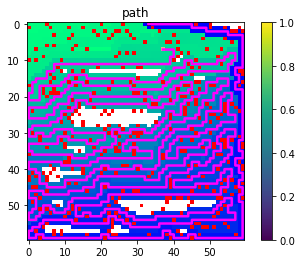

start -2.0 Goal -3.0
start 14 51 Goal 31 43






























































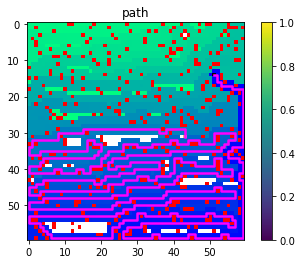

start -2.0 Goal -3.0
start 40 5 Goal 20 36






























































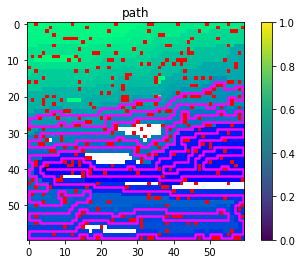

start -2.0 Goal -3.0
start 34 49 Goal 26 39






























































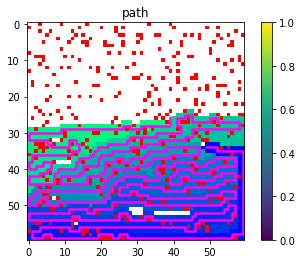

start -2.0 Goal -3.0
start 12 32 Goal 40 46






























































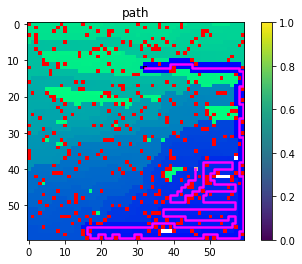

start -2.0 Goal -3.0
start 4 19 Goal 48 12






























































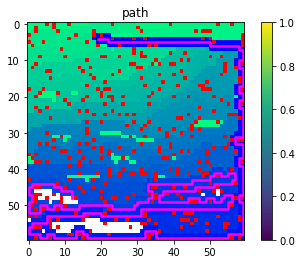

start -2.0 Goal -3.0
start 22 46 Goal 58 49






























































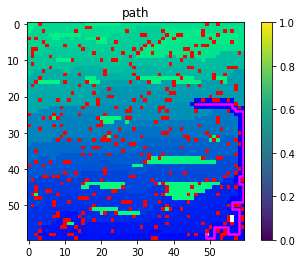

start -2.0 Goal -3.0
start 46 36 Goal 5 5






























































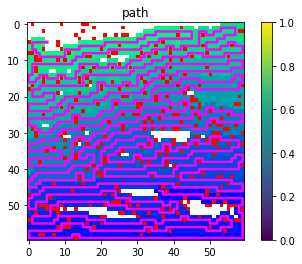

[3178, 226, 3259, 3073, 3142, 1373, 904, 3196, 3004, 1664, 2934, 2440, 2977, 3108, 3132, 1773, 3218, 3136, 3225, 2982]
[1058, 113, 27, 829, 840, 660, 368, 1200, 998, 822, 1498, 1209, 1316, 782, 950, 885, 315, 408, 72, 1533]
[1.5165224075317383, 0.37955546379089355, 1.938267707824707, 1.4237303733825684, 1.6021406650543213, 0.5390896797180176, 0.46873927116394043, 1.3571617603302002, 1.3537085056304932, 0.5858242511749268, 1.0849730968475342, 0.7768151760101318, 1.2125284671783447, 1.4799907207489014, 1.5043199062347412, 0.6307439804077148, 1.7497889995574951, 1.6788573265075684, 1.9990780353546143, 1.069835901260376]
2597.2
794.15
1.2175835847854615
877.7277824018105
444.4481156445598
0.48967327667346927


In [8]:
#Run the program 20 times
import time
import numpy
expanded_nodes=[]
path_length=[]
time_taken=[]

for i in range(20):
    map1 = generateMap2d([60, 60])
    start=time.time()
    exp_cntr, path_dfs=dfs_search(map1)
    stop=time.time()
    expanded_nodes.append(exp_cntr)
    path_length.append(path_dfs)
    timed=stop-start
    time_taken.append(timed)
    
expanded_nodes_mean= numpy.mean(expanded_nodes)
path_mean= numpy.mean(path_length)
time_mean= numpy.mean(time_taken)
expanded_nodes_std_dev = numpy.std(expanded_nodes)
path_mean_std_dev= numpy.std(path_length)
time_mean_std_dev= numpy.std(time_taken)

print(expanded_nodes)
print(path_length)
print(time_taken)
print(expanded_nodes_mean)
print(path_mean)
print(time_mean)
print(expanded_nodes_std_dev)
print(path_mean_std_dev)
print(time_mean_std_dev)



start -2.0 Goal -3.0
start 40 35 Goal 53 10






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.random_integers(7*size_y//10 + 3, s

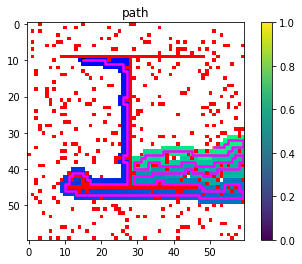

start -2.0 Goal -3.0
start 12 49 Goal 39 32






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


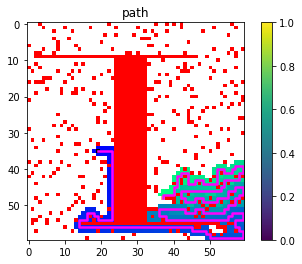

start -2.0 Goal -3.0
start 45 15 Goal 23 10






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


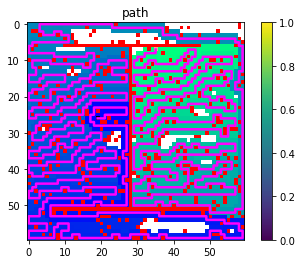

start -2.0 Goal -3.0
start 52 33 Goal 19 8






























































C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


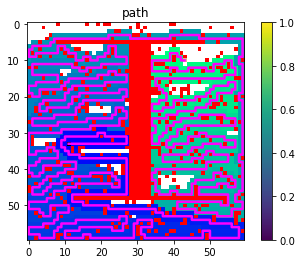

start -2.0 Goal -3.0
start 21 13 Goal 45 30




























































No path to goal


C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_12160\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


TypeError: cannot unpack non-iterable int object

In [9]:
#Run the program 20 times
import time
import numpy
expanded_obstacle_ctr=[]
path_obstacle_taken=[]
time_obstacle_taken=[]

for i in range(20):
    map3, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    exp_obstacle_nodes, path_dfs2=dfs_search(map3)
    stop=time.time()
    #print(type(exp_cntr),type(path))
    expanded_obstacle_ctr.append(exp_obstacle_nodes)
    path_obstacle_taken.append(path_dfs2)
    timed=stop-start
    time_obstacle_taken.append(timed) 


expanded_nodes_obstacle_mean= numpy.mean(expanded_obstacle_ctr)
path_obstacle_mean= numpy.mean(path_obstacle_taken)
time_obstacle_mean= numpy.mean(time_obstacle_taken)
expanded_nodes_obstacle_std_dev = numpy.std(expanded_obstacle_ctr)
path_mean_obstacle_std_dev= numpy.std(path_obstacle_taken)
time_mean_obstacle_std_dev= numpy.std(time_obstacle_taken)

print(expanded_obstacle_ctr)
print(path_obstacle_taken)
print(time_obstacle_taken)
print(expanded_nodes_obstacle_mean)
print(path_obstacle_mean)
print(time_obstacle_mean)
print(expanded_nodes_obstacle_std_dev)
print(path_mean_obstacle_std_dev)
print(time_mean_obstacle_std_dev)

